### 1. What was the change in price of the stock overtime?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime




kdfkm

In [2]:
# the tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:
    
    # Set Dataframe as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

High          Low         Open        Close     Volume  \
Date                                                                        
2021-02-12  3280.250000  3233.310059  3250.000000  3277.709961  2329300.0   
2021-02-16  3308.300049  3253.590088  3254.050049  3268.949951  2563200.0   
2021-02-17  3320.909912  3259.500000  3263.600098  3308.639893  3297500.0   
2021-02-18  3338.000000  3273.939941  3282.419922  3328.229980  3027400.0   
2021-02-19  3333.500000  3245.750000  3328.229980  3249.899902  4297200.0   
2021-02-22  3232.320068  3172.260010  3208.129883  3180.739990  3504600.0   
2021-02-23  3204.729980  3093.600098  3127.030029  3194.500000  4669500.0   
2021-02-24  3171.229980  3125.379883  3166.750000  3159.530029  3003000.0   
2021-02-25  3178.260010  3047.760010  3136.739990  3057.159912  4507100.0   
2021-02-26  3122.439941  3036.699951  3095.199951  3092.929932  4273500.0   

              Adj Close company_name  
Date                                  
2021-02-12  3277.709961       AMAZON  
2021-02-16  3268.949951       AMAZON  
2021-02-17  3308.639893       AMAZON  
2021-02-18  3328.229980       AMAZON  
2021-02-19  3249.899902       AMAZON  
2021-02-22  3180.739990       AMAZON  
2021-02-23  3194.500000       AMAZON  
2021-02-24  3159.530029       AMAZON  
2021-02-25  3057.159912       AMAZON  
2021-02-26  3092.929932       AMAZON

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2020-02-27 to 2021-02-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          1012 non-null   float64
 1   Low           1012 non-null   float64
 2   Open          1012 non-null   float64
 3   Close         1012 non-null   float64
 4   Volume        1012 non-null   float64
 5   Adj Close     1012 non-null   float64
 6   company_name  1012 non-null   object 
dtypes: float64(6), object(1)
memory usage: 63.2+ KB


In [5]:
AAPL.describe()

High         Low        Open       Close        Volume  \
count  253.000000  253.000000  253.000000  253.000000  2.530000e+02   
mean   104.914892  101.862510  103.426967  103.439664  1.530927e+08   
std     24.239008   23.793139   24.225053   23.992684  7.140373e+07   
min     57.125000   53.152500   57.020000   56.092499  4.669130e+07   
25%     80.587502   79.125000   79.665001   79.722504  1.031623e+08   
50%    114.412498  110.292503  112.680000  112.279999  1.354452e+08   
75%    124.849998  120.550003  122.599998  122.720001  1.822744e+08   
max    145.089996  141.369995  143.600006  143.160004  4.268848e+08   

        Adj Close  
count  253.000000  
mean   103.085226  
std     24.108235  
min     55.661041  
25%     79.323433  
50%    111.919373  
75%    122.536896  
max    142.946396

In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-02-27 to 2021-02-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


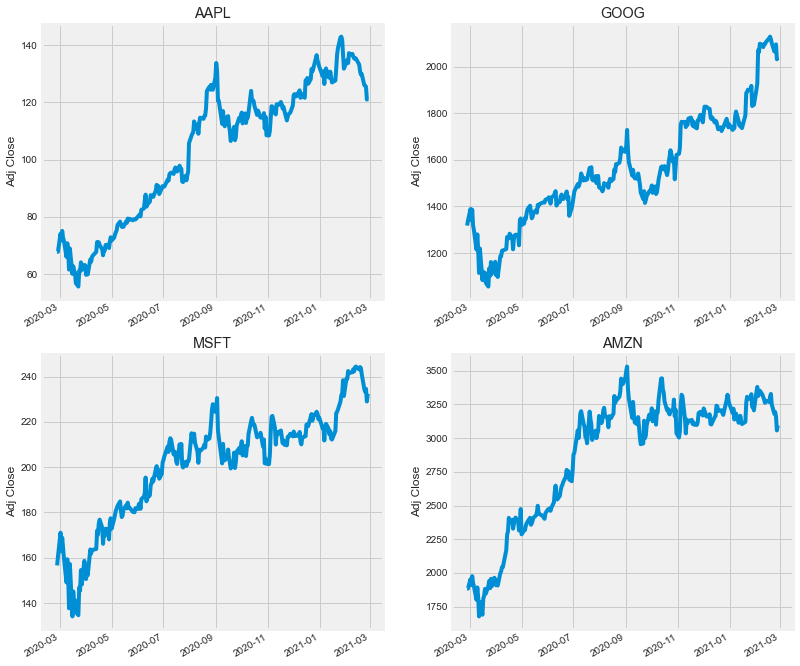

In [7]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i -1]}")
    
    

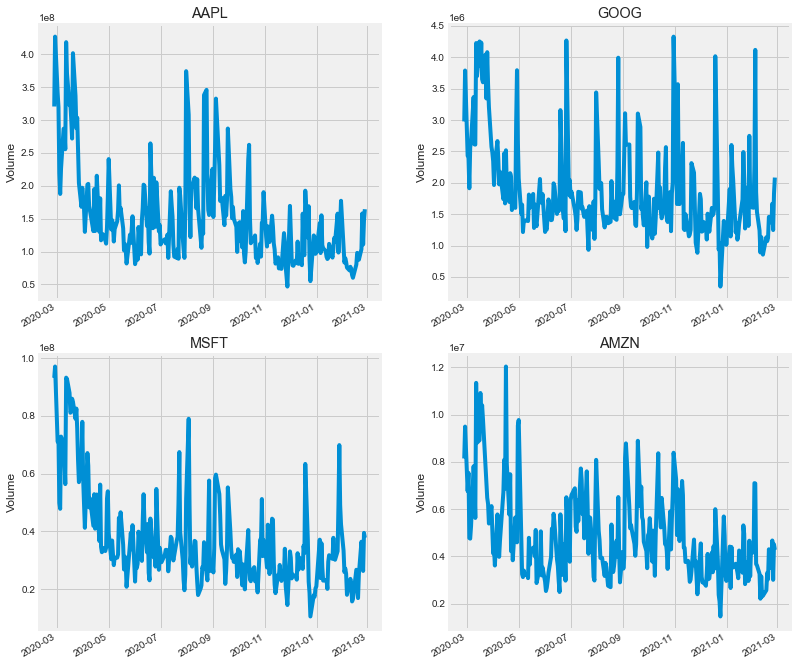

In [8]:
# Now let's plot the total volume of stock being traded each day

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

### 2. What was the moving average of the various stocks?


In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    
    for company in company_list:
        
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [10]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


company_name
AMAZON       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
APPLE        [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
GOOGLE       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
MICROSOFT    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
dtype: object

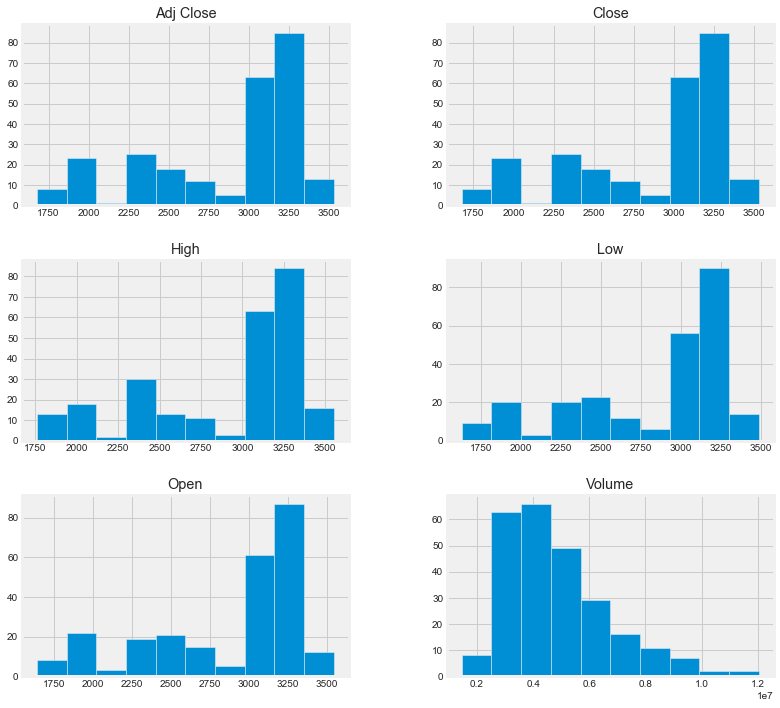

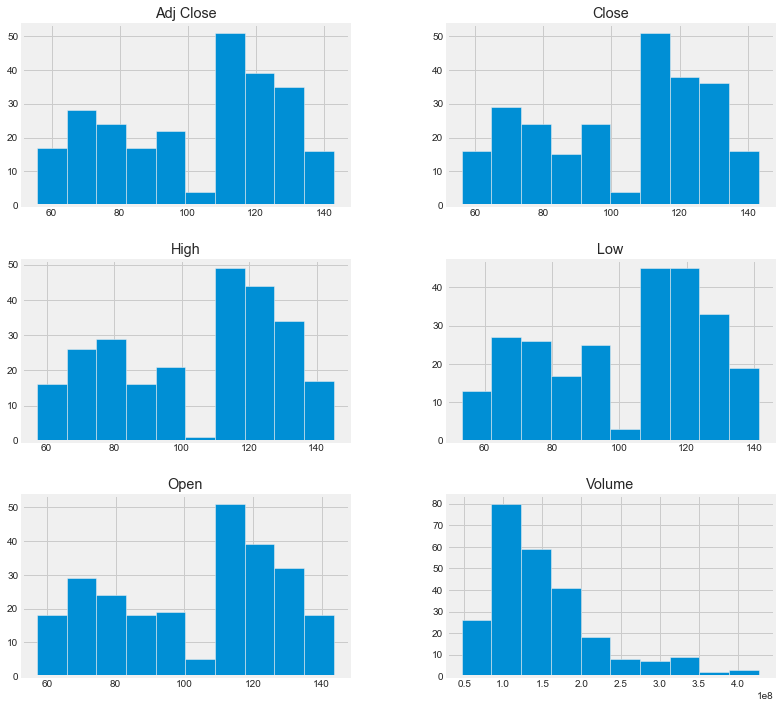

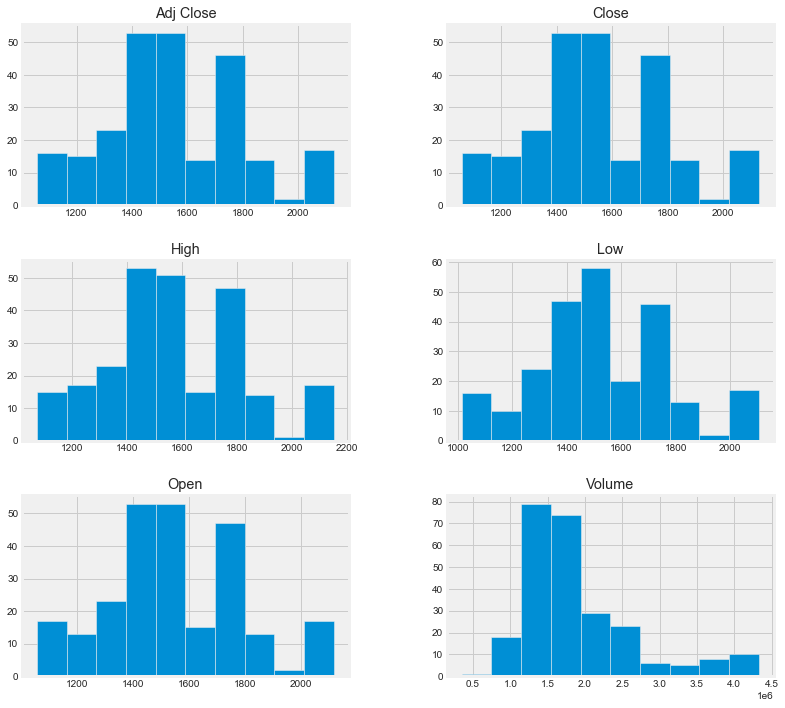

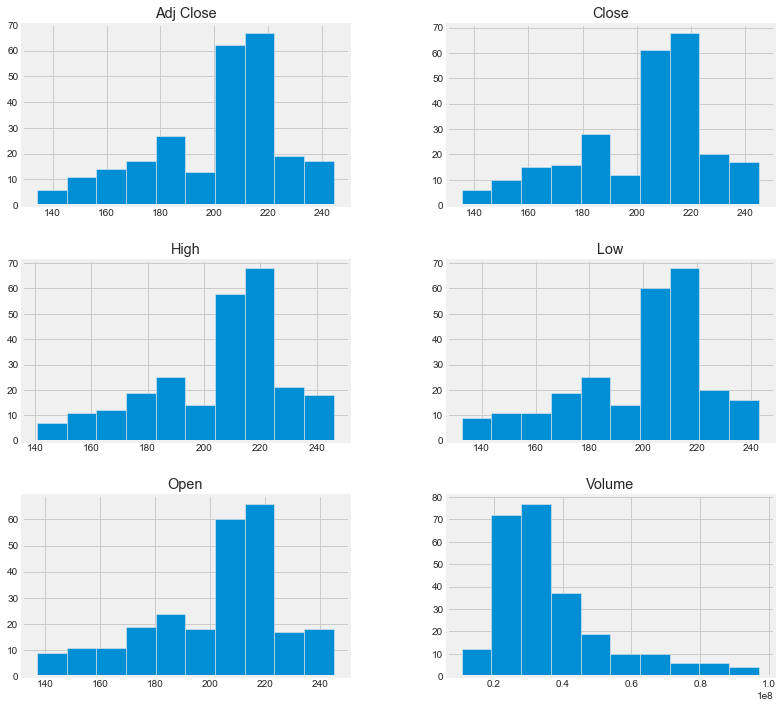

In [11]:
df.groupby("company_name").hist(figsize=(12, 12))

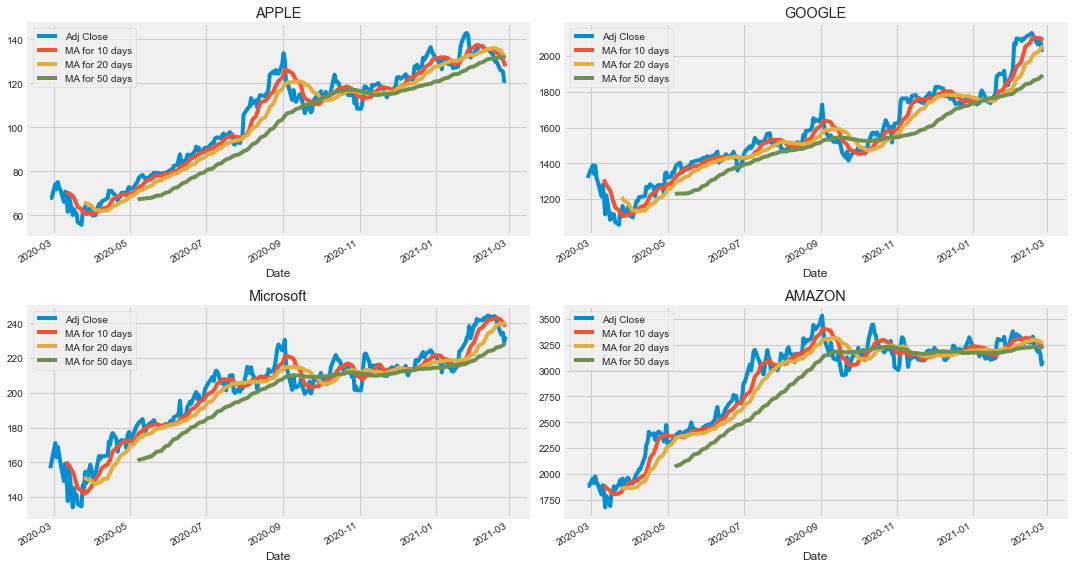

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Microsoft')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## 3. What was the daily return of the stock on average?

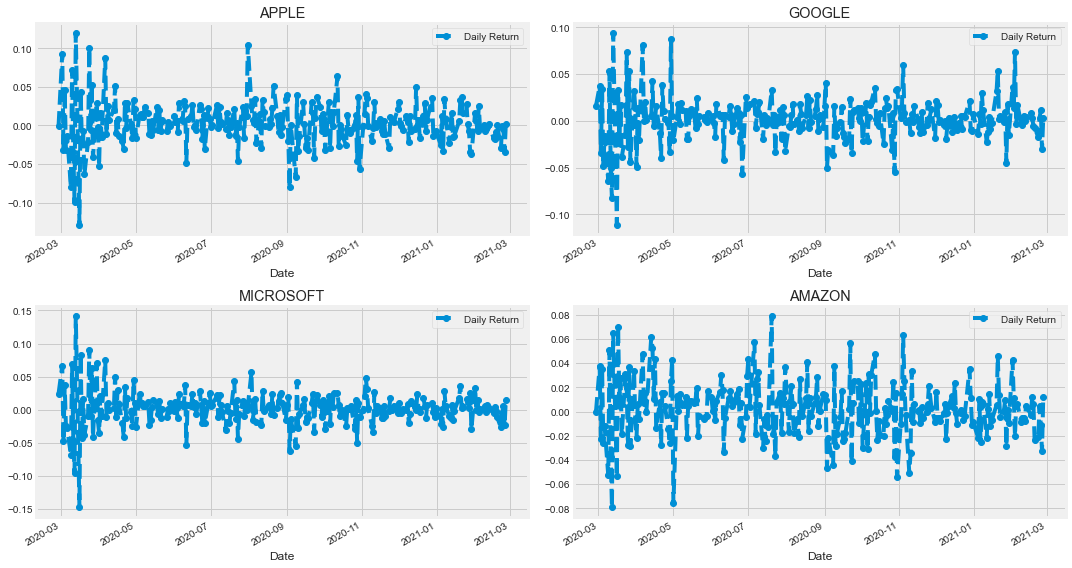

In [13]:
# We'll use pct_change to find the percent change for each day

for company in company_list:
    
    company['Daily Return'] = company['Adj Close'].pct_change()
    
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker = 'o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker = 'o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker = 'o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker = 'o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

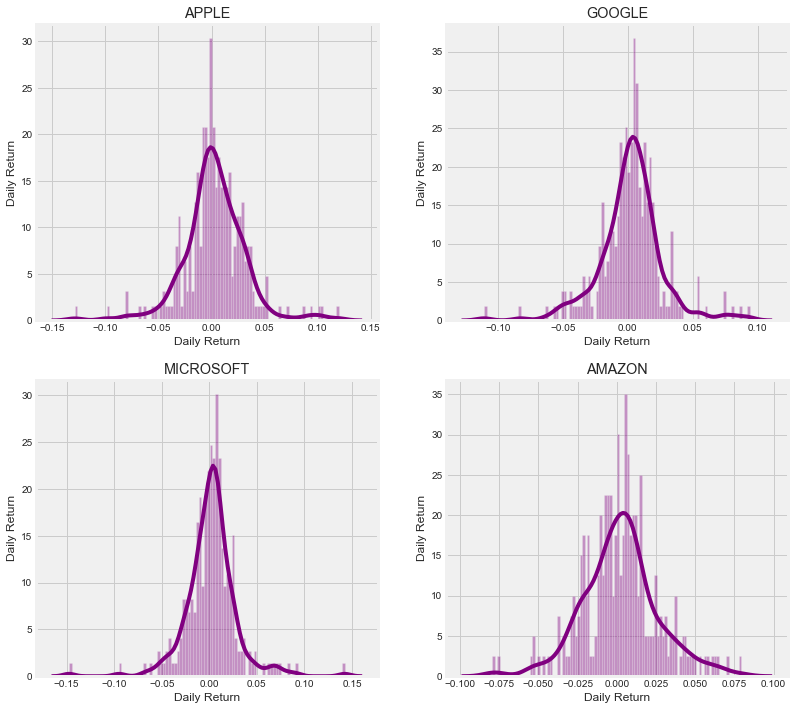

In [15]:
plt.figure(figsize=(12,12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f"{company_name[i -1]}")
    
# Could have also done:
#AAPL['Daily Return'].hist()
    

## 4. What was the correlation between different stocks closing prices?

In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Lets take a quick look
closing_df.head()

Symbols          AAPL         GOOG        MSFT         AMZN
Date                                                       
2020-02-27  67.854019  1318.089966  156.588730  1884.300049
2020-02-28  67.814331  1339.329956  160.380188  1883.750000
2020-03-02  74.127892  1389.109985  171.051773  1953.949951
2020-03-03  71.773636  1341.390015  162.855057  1908.989990
2020-03-04  75.102829  1386.520020  168.834290  1975.829956

In [17]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols         AAPL      GOOG      MSFT      AMZN
Date                                              
2020-02-27       NaN       NaN       NaN       NaN
2020-02-28 -0.000585  0.016114  0.024213 -0.000292
2020-03-02  0.093101  0.037168  0.066539  0.037266
2020-03-03 -0.031759 -0.034353 -0.047920 -0.023010
2020-03-04  0.046385  0.033644  0.036715  0.035013

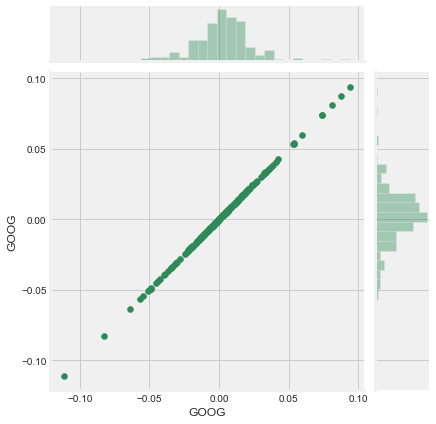

In [18]:
# Comparing Google to itself should show a perfectly linear relationship

sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color = 'seagreen')

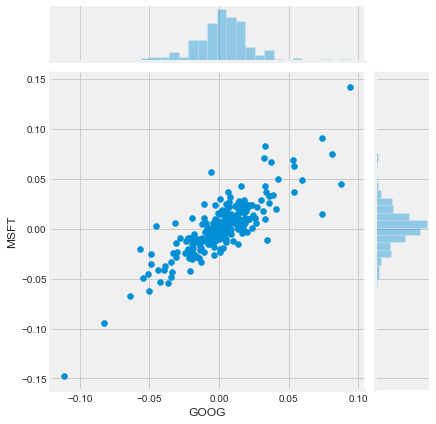

In [19]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

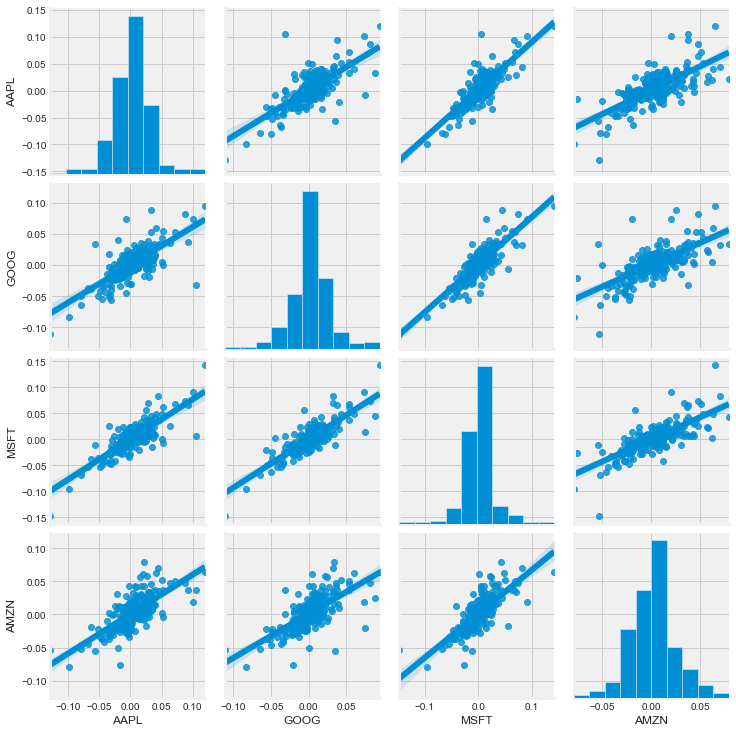

In [20]:
sns.pairplot(tech_rets, kind='reg')

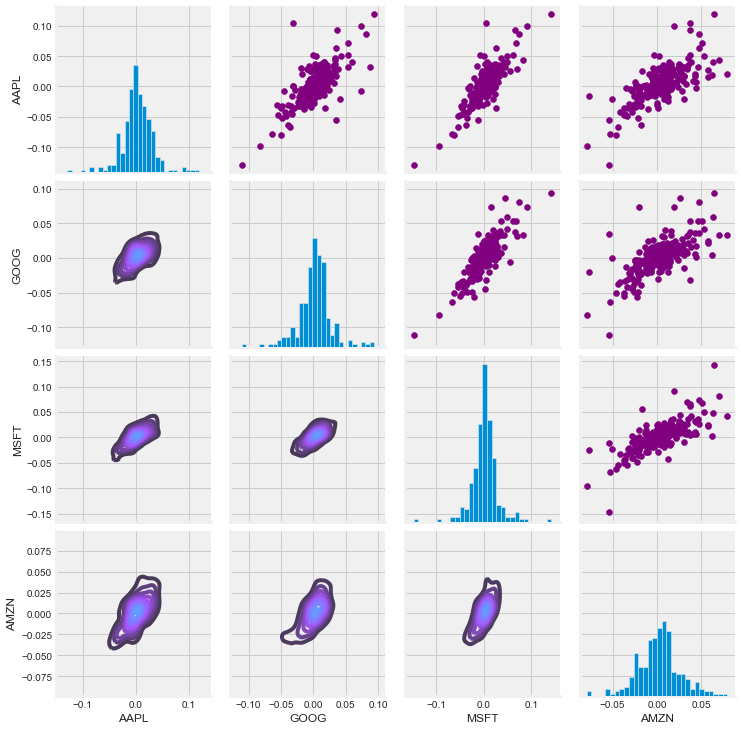

In [21]:
# Set up our gigure by naming it returns_fig, call Pairplot on the DataFrame

return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will lool like.

return_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower traingle in the figure, including the plot type (kde)
# or the color map (BluePurple)

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

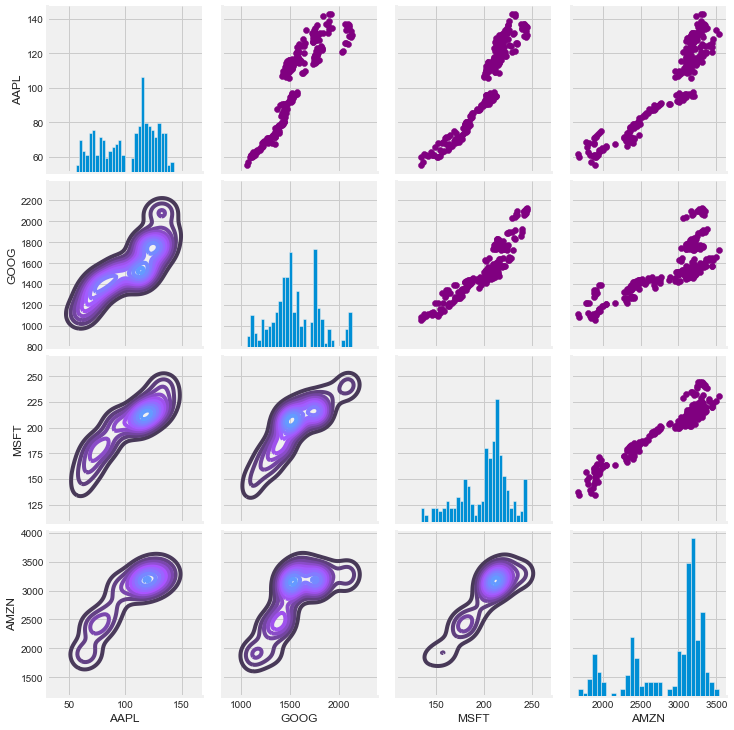

In [22]:
# Set up our figure by naming it returns_fig, call PairPlot on the DataFrame

returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like

returns_fig.map_upper(plt.scatter, color = 'purple')

# We can also dfine the lower triangle in the figure, including the plot
# type (kde) or the color map (BluePurple)

returns_fig.map_lower(sns.kdeplot, cmap ='cool_d')

returns_fig.map_diag(plt.hist, bins=30)


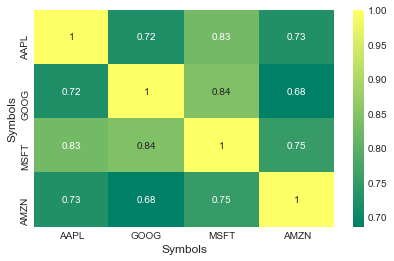

In [23]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

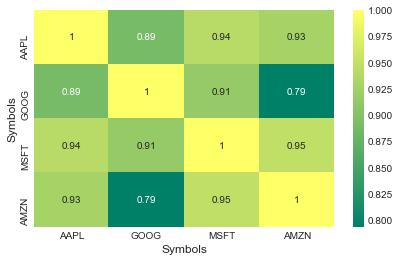

In [24]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

## 5. How much value do we put at risk by investing in a particular stock?

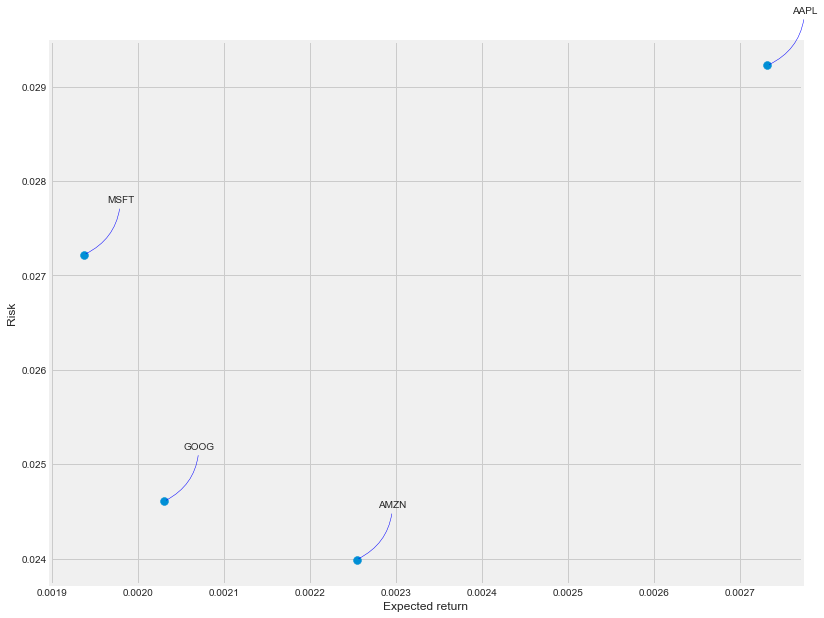

In [26]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## 6. Predicting the closing price stock price of APPLE inc:

In [27]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())

df.head()

High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2012-01-03  14.732143  14.607143  14.621429  14.686786  302220800.0  12.650659
2012-01-04  14.810000  14.617143  14.642857  14.765714  260022000.0  12.718646
2012-01-05  14.948214  14.738214  14.819643  14.929643  271269600.0  12.859850
2012-01-06  15.098214  14.972143  14.991786  15.085714  318292800.0  12.994284
2012-01-09  15.276786  15.048214  15.196429  15.061786  394024400.0  12.973674

In [28]:
df.shape

(2303, 6)

In [29]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [30]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_ln = int(np.ceil( len(dataset) * .95 ))

training_data_ln

2188

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       [0.00880885],
       [0.00862367],
       [0.00904103],
       [0.00885031],
       [0.00852969],
       [0.00809297],
       [0.00944457]])

In [32]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0: int(training_data_ln), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        
        print(x_train)
        print(y_train)
        
        print()
        
# Convert the x_trian and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [36]:
#from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [43]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2128/2128 [==============================] - 41s 19ms/step - loss: 8.5094e-04


In [45]:
# Create a testing dataset
# Create a new array containing scaled values from index 1543 to 2002

test_data = scaled_data[training_data_ln - 60:,:]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_ln:, :]

for i in range(60, len(test_data)):
    
    x_test.append(test_data[i-60:i, 0])
    

x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

3.5173410780819996

In [46]:
# Plot the data

train = data[:training_data_ln]
valid = data[training_data_ln:]

valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-46-2397c6bbf49e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [47]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                               
2020-09-14  115.360001   116.076851
2020-09-15  115.540001   115.124687
2020-09-16  112.129997   114.932533
2020-09-17  110.339996   114.501701
2020-09-18  106.839996   113.733253
...                ...          ...
2021-02-22  126.000000   131.624420
2021-02-23  125.860001   130.090714
2021-02-24  125.349998   128.666168
2021-02-25  120.989998   127.466927
2021-02-26  121.260002   125.782921

[115 rows x 2 columns]